In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [144]:
#Cargar archivo csv des seaborn

# Verificar sin indice 
df= pd.read_csv('Socio_NNCompleto.csv')
df

,Unnamed: 0,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,0,nicolas,nicolas,1,5.399169,Despegue,1.0,blue,Episodio 1,2024-01-25 09:26:42,Astro,0,0.000000,0.000000
1,1,nicolas,nicolas,0,1.283400,Despegue,2.0,violet,Episodio 1,2024-01-25 09:26:46,Astro,0,0.000000,0.000000
2,2,nicolas,nicolas,1,2.700226,Despegue,3.0,green,Episodio 1,2024-01-25 09:26:48,Astro,0,0.000000,0.000000
3,3,nicolas,nicolas,0,3.050262,Despegue,4.0,green,Episodio 1,2024-01-25 09:26:57,Astro,0,0.000000,0.000000
4,4,nicolas,nicolas,0,4.750256,Despegue,5.0,green,Episodio 1,2024-01-25 09:26:58,Astro,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5860,ALEIDA,ESMERALDA,2,0.000000,Sin interacción,0.0,sin color,Episodio 1,2024-05-28 16:15:49,Astro,2,0.000000,332.240000
5861,5861,ALEIDA,JOSE JAVIER,0,2.135419,Asteroides,1.0,green,Episodio 3,2024-04-06 11:09:54,Astro,0,0.000000,0.000000
5862,5862,ALEIDA,JOSE JAVIER,2,0.000000,Asteroides,0.0,sin color,Episodio 3,2024-04-06 11:09:58,Astro,2,2.271806,0.000000
5863,5863,ALEIDA,JOSE JAVIER,2,0.000000,Sin interacción,0.0,sin color,Episodio 3,2024-04-06 11:09:58,Astro,2,0.000000,6.478299


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5865 non-null   int64  
 1   Administrador          5865 non-null   object 
 2   Usuario                5865 non-null   object 
 3   botón correcto         5865 non-null   int64  
 4   tiempo de interacción  5865 non-null   float64
 5   mini juego             5865 non-null   object 
 6   número de interacción  5865 non-null   float64
 7   color presionado       5865 non-null   object 
 8   dificultad             5865 non-null   object 
 9   fecha                  5865 non-null   object 
 10  Juego                  5865 non-null   object 
 11  auto push              5865 non-null   int64  
 12  tiempo de lección      5865 non-null   float64
 13  tiempo de sesión       5865 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 641.6+ 

In [146]:
df['fecha'] = pd.to_datetime(df['fecha'])

**Cambio de nombres**

In [147]:
# Supongamos que tu DataFrame se llama df
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Si prefieres quitar los espacios en lugar de reemplazarlos con guiones bajos:
# df.columns = df.columns.str.replace(' ', '')

print(df.columns)

Index(['unnamed:_0', 'administrador', 'usuario', 'botón_correcto',
       'tiempo_de_interacción', 'mini_juego', 'número_de_interacción',
       'color_presionado', 'dificultad', 'fecha', 'juego', 'auto_push',
       'tiempo_de_lección', 'tiempo_de_sesión'],
      dtype='object')


**Quitar espacio**

In [148]:
# Eliminar espacios dentro de los valores de texto en todas las columnas tipo object
df = df.apply(lambda col: col.str.replace(' ', '') if col.dtype == 'object' else col)

In [149]:
df

,unnamed:_0,administrador,usuario,botón_correcto,tiempo_de_interacción,mini_juego,número_de_interacción,color_presionado,dificultad,fecha,juego,auto_push,tiempo_de_lección,tiempo_de_sesión
0,0,nicolas,nicolas,1,5.399169,Despegue,1.0,blue,Episodio1,2024-01-25 09:26:42,Astro,0,0.000000,0.000000
1,1,nicolas,nicolas,0,1.283400,Despegue,2.0,violet,Episodio1,2024-01-25 09:26:46,Astro,0,0.000000,0.000000
2,2,nicolas,nicolas,1,2.700226,Despegue,3.0,green,Episodio1,2024-01-25 09:26:48,Astro,0,0.000000,0.000000
3,3,nicolas,nicolas,0,3.050262,Despegue,4.0,green,Episodio1,2024-01-25 09:26:57,Astro,0,0.000000,0.000000
4,4,nicolas,nicolas,0,4.750256,Despegue,5.0,green,Episodio1,2024-01-25 09:26:58,Astro,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5860,ALEIDA,ESMERALDA,2,0.000000,Sininteracción,0.0,sincolor,Episodio1,2024-05-28 16:15:49,Astro,2,0.000000,332.240000
5861,5861,ALEIDA,JOSEJAVIER,0,2.135419,Asteroides,1.0,green,Episodio3,2024-04-06 11:09:54,Astro,0,0.000000,0.000000
5862,5862,ALEIDA,JOSEJAVIER,2,0.000000,Asteroides,0.0,sincolor,Episodio3,2024-04-06 11:09:58,Astro,2,2.271806,0.000000
5863,5863,ALEIDA,JOSEJAVIER,2,0.000000,Sininteracción,0.0,sincolor,Episodio3,2024-04-06 11:09:58,Astro,2,0.000000,6.478299


## Tiempo de interacción

F_onewayResult(statistic=np.float64(95.74169552928231), pvalue=np.float64(1.7068026355735787e-60))


,df,sum_sq,mean_sq,F,PR(>F)
dificultad,3.0,5.746886e+04,19156.285259,95.741696,1.706803e-60
Residual,5861.0,1.172686e+06,200.082996,NaN,NaN


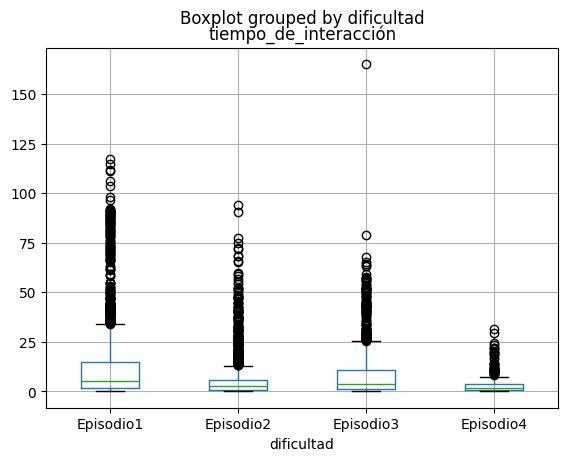

In [170]:
#Analizamos los diagramas de caja de la varibale objetivo tarifa por cadda categoria 
#De la variable independiente 'sex'


df.boxplot('tiempo_de_interacción', by ='dificultad')


#defino grupos donde me entrga la columna fare separada por grupos de las categorias de la columna sex: male y female
Fare_1 = df.tiempo_de_interacción[df.dificultad=='Episodio1']
Fare_2 = df.tiempo_de_interacción[df.dificultad=='Episodio2']
Fare_3 = df.tiempo_de_interacción[df.dificultad=='Episodio3']
Fare_4 = df.tiempo_de_interacción[df.dificultad=='Episodio4']


#p-value <0.05, se rechaza la hipótesis de que todas las medidas son iguales
# de igual form implica que l variable categorica influye en la variable cuantitativa 

anova = stats.f_oneway(Fare_1, Fare_2, Fare_3, Fare_4)
print(anova)

#p-value <0.5, se rechaza la hiposis de que todas las medias son iguales
mod = ols('tiempo_de_interacción ~ dificultad', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

In [171]:
mod = ols('tiempo_de_interacción ~ dificultad + color_presionado + dificultad:color_presionado', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
dificultad,3.0,5.746886e+04,19156.285259,106.683251,3.041275e-67
color_presionado,5.0,9.369342e+04,18738.683178,104.357584,8.319161e-106
dificultad:color_presionado,15.0,2.982837e+04,1988.558305,11.074478,3.932079e-27
Residual,5843.0,1.049182e+06,179.562256,NaN,NaN


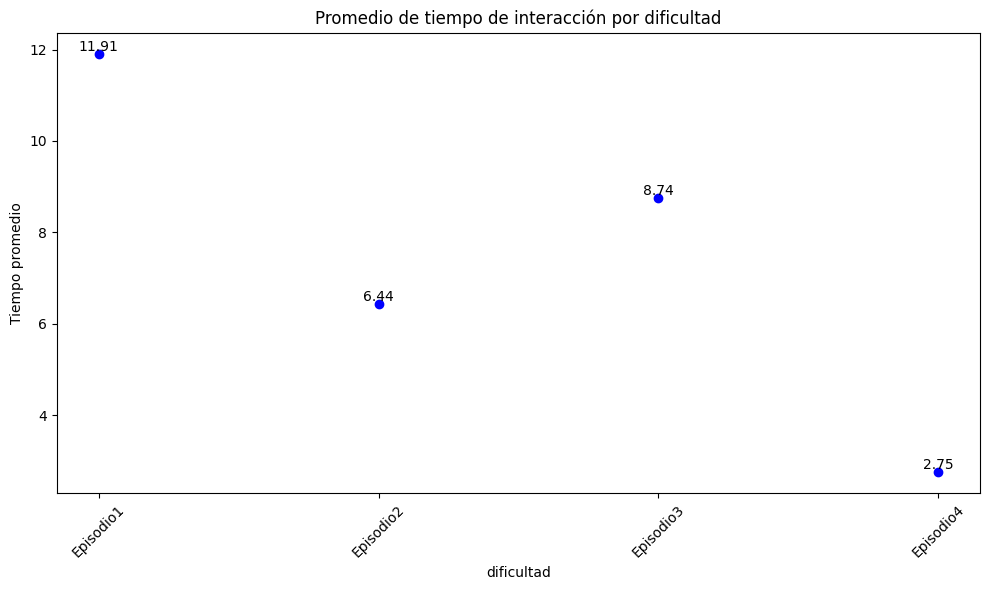

In [197]:
promedios = df.groupby('dificultad')['tiempo_de_interacción'].mean()
promedios

# Paso 2: Preparar datos
x = list(range(len(promedios)))
y = promedios.values
labels = promedios.index

# Paso 3: Graficar scatter
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')

# Añadir etiquetas con los valores
for i, label in enumerate(y):
    plt.text(x[i], y[i], f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Promedio de tiempo de interacción por dificultad')
plt.xlabel('dificultad')
plt.ylabel('Tiempo promedio')
plt.tight_layout()
plt.show()

## Número de interacción

,df,sum_sq,mean_sq,F,PR(>F)
dificultad,3.0,2.011464e+05,67048.805130,76.289573,2.103511e-48
Residual,5861.0,5.151072e+06,878.872471,NaN,NaN


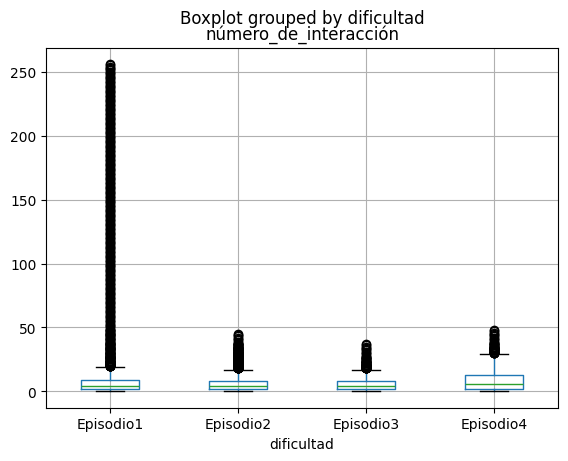

In [174]:
#Analizamos los diagramas de caja de la varibale objetivo tarifa por cadda categoria 
#De la variable independiente 'sex'


df.boxplot('número_de_interacción', by ='dificultad')


#defino grupos donde me entrga la columna fare separada por grupos de las categorias de la columna sex: male y female
Fare_1 = df.número_de_interacción[df.dificultad=='Episodio1']
Fare_2 = df.número_de_interacción[df.dificultad=='Episodio2']
Fare_3 = df.número_de_interacción[df.dificultad=='Episodio3']
Fare_4 = df.número_de_interacción[df.dificultad=='Episodio4']


#p-value <0.05, se rechaza la hipótesis de que todas las medidas son iguales
# de igual form implica que l variable categorica influye en la variable cuantitativa 

anova = stats.f_oneway(Fare_1, Fare_2, Fare_3, Fare_4)

#p-value <0.5, se rechaza la hiposis de que todas las medias son iguales
mod = ols('número_de_interacción ~ dificultad', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table


In [173]:

mod = ols('número_de_interacción ~ dificultad + color_presionado + dificultad:color_presionado', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
dificultad,3.0,2.011464e+05,67048.805130,96.152016,9.609415e-61
color_presionado,5.0,5.187390e+05,103747.795308,148.780573,4.031783e-149
dificultad:color_presionado,15.0,5.580737e+05,37204.914504,53.354083,2.635323e-150
Residual,5843.0,4.074446e+06,697.320849,NaN,NaN


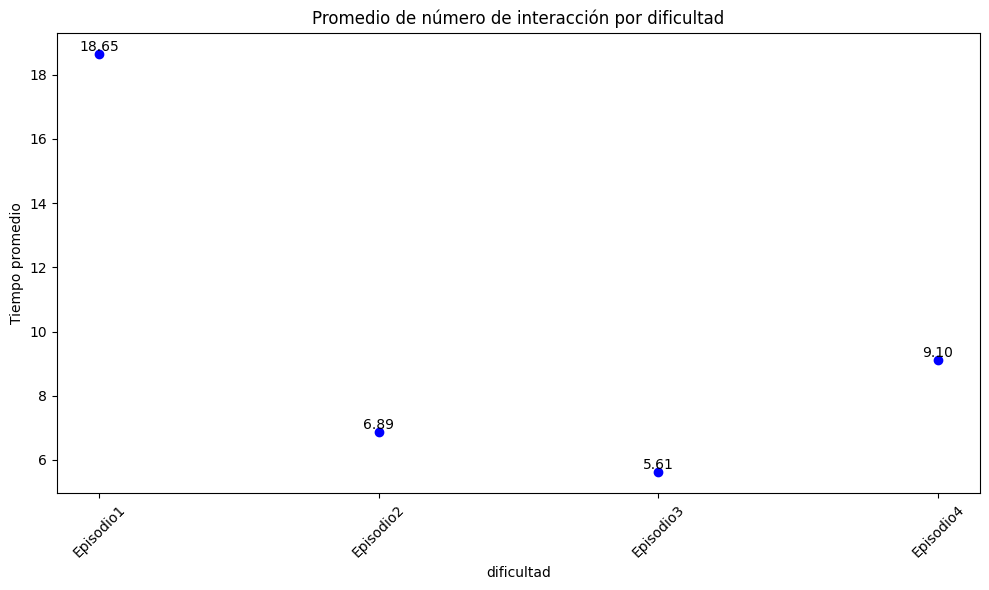

In [154]:
promedios = df.groupby('dificultad')['número_de_interacción'].mean()
promedios

# Paso 2: Preparar datos
x = list(range(len(promedios)))
y = promedios.values
labels = promedios.index

# Paso 3: Graficar scatter
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')

# Añadir etiquetas con los valores
for i, label in enumerate(y):
    plt.text(x[i], y[i], f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Promedio de número de interacción por dificultad')
plt.xlabel('dificultad')
plt.ylabel('Tiempo promedio')
plt.tight_layout()
plt.show()

## Botón correcto

In [155]:
#Cargar archivo csv des seaborn

# Verificar sin indice 
df1= pd.read_csv('DATA_Completo_NÚMERICA.csv')
df1

,Unnamed: 0.1,Unnamed: 0,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,0,0,1,2,1,5.399169,8,1.0,3,0,2024-01-25 09:26:42,0,0,0.000000,0.000000
1,1,1,1,2,0,1.283400,8,2.0,0,0,2024-01-25 09:26:46,0,0,0.000000,0.000000
2,2,2,1,2,1,2.700226,8,3.0,1,0,2024-01-25 09:26:48,0,0,0.000000,0.000000
3,3,3,1,2,0,3.050262,8,4.0,1,0,2024-01-25 09:26:57,0,0,0.000000,0.000000
4,4,4,1,2,0,4.750256,8,5.0,1,0,2024-01-25 09:26:58,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5860,5860,0,30,2,0.000000,9,0.0,4,0,2024-05-28 16:15:49,0,2,0.000000,332.240000
5861,5861,5861,0,3,0,2.135419,0,1.0,1,2,2024-04-06 11:09:54,0,0,0.000000,0.000000
5862,5862,5862,0,3,2,0.000000,0,0.0,4,2,2024-04-06 11:09:58,0,2,2.271806,0.000000
5863,5863,5863,0,3,2,0.000000,9,0.0,4,2,2024-04-06 11:09:58,0,2,0.000000,6.478299


In [156]:
df1['fecha'] = pd.to_datetime(df1['fecha'])

In [ ]:
# Supongamos que tu DataFrame se llama df
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

# Si prefieres quitar los espacios en lugar de reemplazarlos con guiones bajos:
# df.columns = df.columns.str.replace(' ', '')

print(df1.columns)

Index(['unnamed:_0', 'administrador', 'usuario', 'botón_correcto',
       'tiempo_de_interacción', 'mini_juego', 'número_de_interacción',
       'color_presionado', 'dificultad', 'fecha', 'juego', 'auto_push',
       'tiempo_de_lección', 'tiempo_de_sesión'],
      dtype='object')


In [175]:
df['color_presionado'].unique()

array(['blue', 'violet', 'green', 'yellow', 'sincolor', 'red'],
      dtype=object)

F_onewayResult(statistic=np.float64(1400.282174222385), pvalue=np.float64(0.0))


,df,sum_sq,mean_sq,F,PR(>F)
color_presionado,5.0,1514.700836,302.940167,1400.282174,0.0
Residual,5859.0,1267.549121,0.216342,NaN,NaN


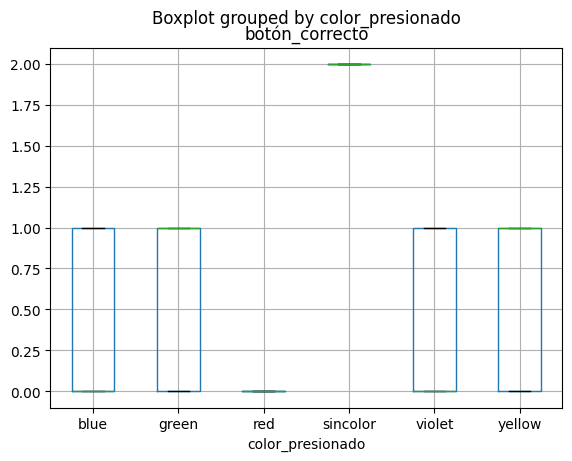

In [180]:
#Analizamos los diagramas de caja de la varibale objetivo tarifa por cadda categoria 
#De la variable independiente 'sex'


df.boxplot('botón_correcto', by ='color_presionado')


#defino grupos donde me entrga la columna fare separada por grupos de las categorias de la columna sex: male y female
Fare_1 = df['botón_correcto'][df['color_presionado'] == 'blue']
Fare_2 = df1['botón_correcto'][df['color_presionado'] == 'violet']
Fare_3 = df['botón_correcto'][df['color_presionado'] == 'green']
Fare_4 = df['botón_correcto'][df['color_presionado'] == 'yellow']                          
Fare_5 = df['botón_correcto'][df['color_presionado'] == 'sincolor']
Fare_6 = df['botón_correcto'][df['color_presionado'] == 'red']




#p-value <0.05, se rechaza la hipótesis de que todas las medidas son iguales
# de igual form implica que l variable categorica influye en la variable cuantitativa 

anova = stats.f_oneway(
    Fare_1, Fare_2, Fare_3, Fare_4, Fare_5, Fare_6,
)

print(anova)

#p-value <0.5, se rechaza la hiposis de que todas las medias son iguales
mod = ols('botón_correcto ~ color_presionado', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

In [181]:
mod = ols('botón_correcto ~ color_presionado + dificultad + color_presionado:dificultad', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
color_presionado,5.0,1514.700836,302.940167,1423.526463,0.000000e+00
dificultad,3.0,4.320772,1.440257,6.767820,1.492173e-04
color_presionado:dificultad,15.0,20.300041,1.353336,6.359374,1.292266e-13
Residual,5843.0,1243.446780,0.212810,NaN,NaN


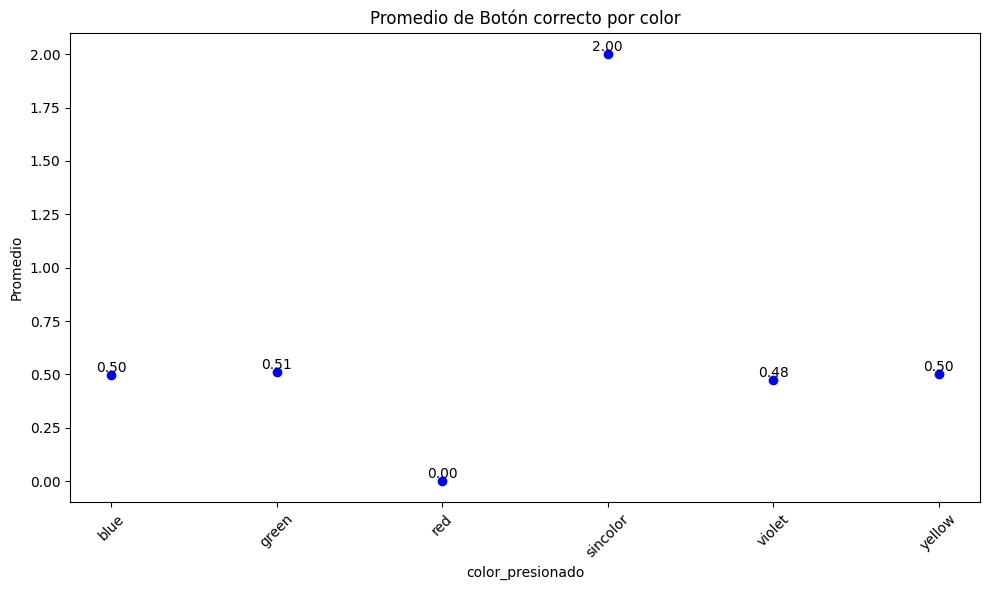

In [177]:
import matplotlib.pyplot as plt

# Paso 1: Calcular promedio de tiempo por juego
promedios2 = df.groupby('color_presionado')['botón_correcto'].mean()

# Paso 2: Preparar datos
x = list(range(len(promedios2)))
y = promedios2.values
labels = promedios2.index

# Paso 3: Graficar scatter
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')

# Añadir etiquetas con los valores
for i, label in enumerate(y):
    plt.text(x[i], y[i], f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Promedio de Botón correcto por color')
plt.xlabel('color_presionado')
plt.ylabel('Promedio')
plt.tight_layout()
plt.show()

## Tiempo de lección

In [161]:
df['juego'].unique()

array(['Astro', 'Cadetes'], dtype=object)

F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8940\2015061075.py:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova = stats.f_oneway(Fare_1, Fare_2)


,df,sum_sq,mean_sq,F,PR(>F)
juego,1.0,1.958268e+04,19582.683470,29.942946,4.633908e-08
Residual,5863.0,3.834401e+06,653.999883,NaN,NaN


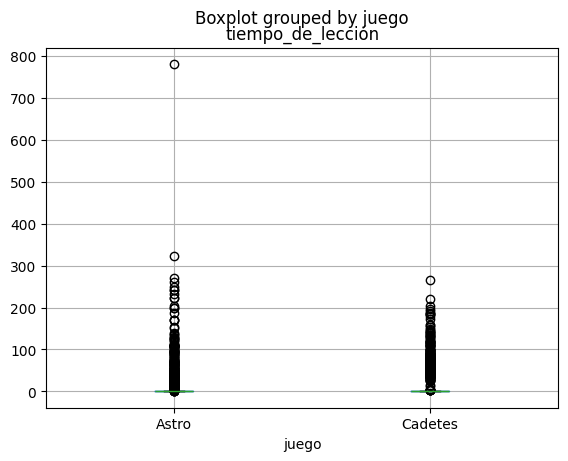

In [182]:
#Analizamos los diagramas de caja de la varibale objetivo tarifa por cadda categoria 
#De la variable independiente 'sex'


df.boxplot('tiempo_de_lección', by ='juego')


#defino grupos donde me entrga la columna fare separada por grupos de las categorias de la columna sex: male y female
Fare_1 = df['tiempo_de_lección'][df['juego'] == 'Astro']
Fare_2 = df['tiempo_de_lección'][df['juego'] == 'Asteroides']

#p-value <0.05, se rechaza la hipótesis de que todas las medidas son iguales
# de igual form implica que l variable categorica influye en la variable cuantitativa 

anova = stats.f_oneway(Fare_1, Fare_2)

print(anova)

#p-value <0.5, se rechaza la hiposis de que todas las medias son iguales
mod = ols('tiempo_de_lección ~ juego', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table



In [183]:
mod = ols('tiempo_de_lección ~ juego + dificultad + juego:dificultad', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
juego,1.0,1.958268e+04,19582.683470,29.991340,4.520450e-08
dificultad,3.0,8.111864e+03,2703.954644,4.141170,6.098856e-03
juego:dificultad,3.0,1.992953e+03,664.317734,1.017418,3.837195e-01
Residual,5857.0,3.824296e+06,652.944595,NaN,NaN


In [163]:
promedios1 = df.groupby('juego')['tiempo_de_lección'].mean()
promedios1

juego
Astro      4.719120
Cadetes    8.544462
Name: tiempo_de_lección, dtype: float64

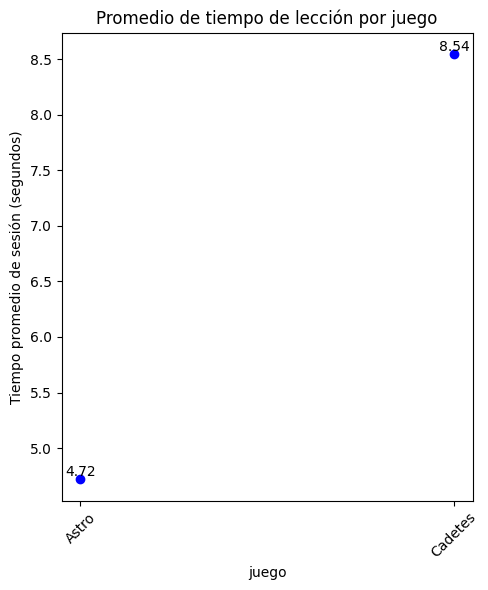

In [184]:
import matplotlib.pyplot as plt

# Paso 1: Calcular promedio de tiempo por juego
promedios1 = df.groupby('juego')['tiempo_de_lección'].mean()

# Paso 2: Preparar datos
x = list(range(len(promedios1)))
y = promedios1.values
labels = promedios1.index

# Paso 3: Graficar scatter
plt.figure(figsize=(5, 6))
plt.scatter(x, y, color='blue')

# Añadir etiquetas con los valores
for i, label in enumerate(y):
    plt.text(x[i], y[i], f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Promedio de tiempo de lección por juego')
plt.xlabel('juego')
plt.ylabel('Tiempo promedio de sesión (segundos)')
plt.tight_layout()
plt.show()

## Tiempo de sesión

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8940\2287578870.py:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova = stats.f_oneway(Fare_1, Fare_2)


F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))


,df,sum_sq,mean_sq,F,PR(>F)
juego,1.0,1.142307e+04,11423.074614,1.06155,0.302904
Residual,5863.0,6.309028e+07,10760.749930,NaN,NaN


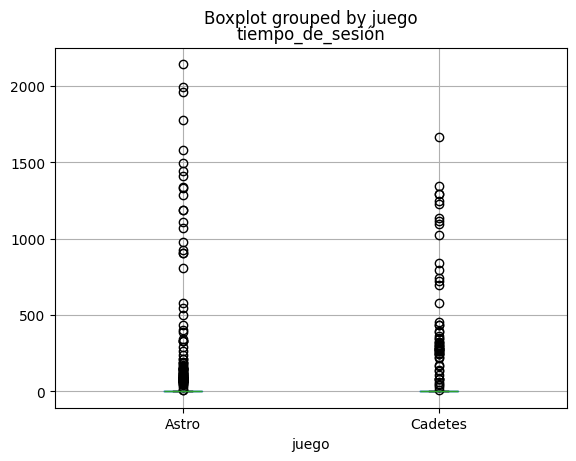

In [185]:
#Analizamos los diagramas de caja de la varibale objetivo tarifa por cadda categoria 
#De la variable independiente 'sex'


df.boxplot('tiempo_de_sesión', by ='juego')


#defino grupos donde me entrga la columna fare separada por grupos de las categorias de la columna sex: male y female
Fare_1 = df['tiempo_de_lección'][df['juego'] == 'Astro']
Fare_2 = df['tiempo_de_sesión'][df['juego'] == 'Asteroides']

#p-value <0.05, se rechaza la hipótesis de que todas las medidas son iguales
# de igual form implica que l variable categorica influye en la variable cuantitativa 

anova = stats.f_oneway(Fare_1, Fare_2)

print(anova)

#p-value <0.5, se rechaza la hiposis de que todas las medias son iguales
mod = ols('tiempo_de_sesión ~ juego', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

In [187]:
mod = ols('tiempo_de_sesión ~ juego + dificultad + juego:dificultad', data = df).fit()
anova_table =sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
juego,1.0,1.142307e+04,1.142307e+04,1.205324,2.723052e-01
dificultad,3.0,7.658701e+05,2.552900e+05,26.937347,2.690795e-17
juego:dificultad,3.0,6.816575e+06,2.272192e+06,239.754040,9.793647e-147
Residual,5857.0,5.550783e+07,9.477178e+03,NaN,NaN


## Obtener promedios

In [199]:
promedios = df.groupby('juego')['tiempo_de_sesión'].mean()
print(promedios)

promedios_dificultad_color = df.groupby(['dificultad', 'color_presionado'])['tiempo_de_interacción'].mean()
print(promedios_dificultad_color)

juego
Astro      10.109480
Cadetes    13.031114
Name: tiempo_de_sesión, dtype: float64
dificultad  color_presionado
Episodio1   blue                10.736314
            green               11.031956
            sincolor             0.000000
            violet              20.850530
            yellow               9.549815
Episodio2   blue                 7.083883
            green                8.435974
            sincolor             0.000000
            violet               7.841131
            yellow               6.120498
Episodio3   blue                 8.830239
            green               10.271439
            red                  2.397326
            sincolor             0.000000
            violet              11.909415
            yellow               9.830037
Episodio4   blue                 3.276135
            green                3.012558
            red                  2.236520
            sincolor             0.000000
            violet               3.663647
  

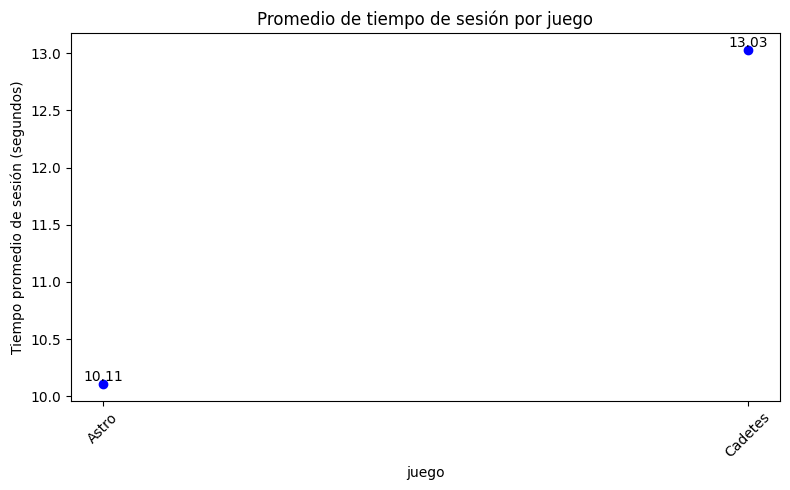

In [192]:
import matplotlib.pyplot as plt

# Paso 1: Calcular promedio de tiempo por juego
promedios = df.groupby('juego')['tiempo_de_sesión'].mean()

# Paso 2: Preparar datos
x = list(range(len(promedios)))
y = promedios.values
labels = promedios.index

# Paso 3: Graficar scatter
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue')

# Añadir etiquetas con los valores
for i, label in enumerate(y):
    plt.text(x[i], y[i], f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Promedio de tiempo de sesión por juego')
plt.xlabel('juego')
plt.ylabel('Tiempo promedio de sesión (segundos)')
plt.tight_layout()
plt.show()